170498071/170498071 [==============================] - 2s 0us/step
Eğitim veri seti boyutu: (50000, 32, 32, 3)
Test veri seti boyutu: (10000, 32, 32, 3)


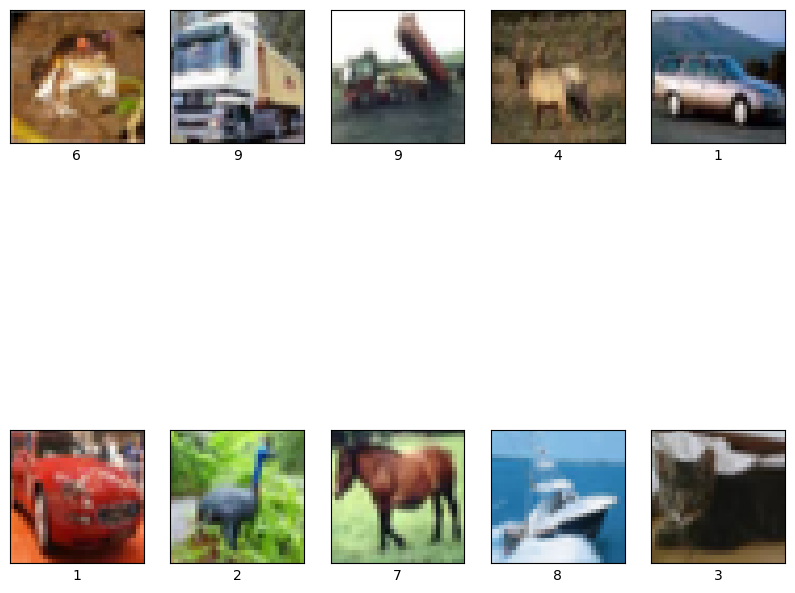

Düzleştirilmiş Eğitim veri seti boyutu: (50000, 3072)
Düzleştirilmiş Test veri seti boyutu: (10000, 3072)
KNN modeli eğitiliyor...
KNN Modeli Başarımları:
Accuracy: 0.3303
F1 Score: 0.3192
Recall: 0.3303
Precision: 0.4304
---------------------
Random Forest modeli eğitiliyor...
Random Forest Modeli Başarımları:
Accuracy: 0.4654
F1 Score: 0.4621
Recall: 0.4654
Precision: 0.4610
---------------------
Decision Tree modeli eğitiliyor...
Decision Tree Modeli Başarımları:
Accuracy: 0.3055
F1 Score: 0.3027
Recall: 0.3055
Precision: 0.3053
---------------------
Logistic Regression modeli eğitiliyor...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Modeli Başarımları:
Accuracy: 0.3859
F1 Score: 0.3839
Recall: 0.3859
Precision: 0.3831
---------------------


,KNN,Random Forest,Decision Tree,Logistic Regression
Accuracy,0.330300,0.465400,0.305500,0.385900
F1 Score,0.319192,0.462064,0.302745,0.383898
Recall,0.330300,0.465400,0.305500,0.385900
Precision,0.430375,0.461017,0.305324,0.383076


In [1]:
# Gerekli kütüphaneleri import edelim
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import pandas as pd

# Adım 1: Veri Seti Yüklenmesi ve Görselleştirme
# CIFAR-10 veri setini yükleme
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Veri seti boyutlarını ve birkaç örneği görselleştirme
print("Eğitim veri seti boyutu:", X_train.shape)
print("Test veri seti boyutu:", X_test.shape)

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(y_train[i][0])
plt.show()

# 2. Veri Ön İşleme: Normalize Etme
X_train_flat = X_train.reshape(X_train.shape[0], -1).astype('float32') / 255.0
X_test_flat = X_test.reshape(X_test.shape[0], -1).astype('float32') / 255.0

# Veri boyutlarını kontrol etme
print("Düzleştirilmiş Eğitim veri seti boyutu:", X_train_flat.shape)
print("Düzleştirilmiş Test veri seti boyutu:", X_test_flat.shape)

# 3. Model Oluşturma ve Eğitme
models = {
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

results = {}
for name, model in models.items():
    print(f"{name} modeli eğitiliyor...")
    model.fit(X_train_flat, y_train.ravel())  # Veri üzerinde eğitim yapma

    # Test verisi ile tahminde bulunma
    y_pred = model.predict(X_test_flat)

    # Değerlendirme metriklerini hesaplama
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')

    # Sonuçları kaydetme
    results[name] = {"Accuracy": accuracy, "F1 Score": f1, "Recall": recall, "Precision": precision}

    # Değerlendirme sonuçlarını yazdırma
    print(f"{name} Modeli Başarımları:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print("---------------------")

# Sonuçları tablo şeklinde gösterme
results_df = pd.DataFrame(results)
results_df
